# Организационное
- графики (см. https://pudding.cool/)

**На НЭ по анализу данных можно пользоваться Excel** (мы будем проходить питон, про Excel можно спрашивать)

# Введение в Pandas

Документация: https://pandas.pydata.org/pandas-docs/stable/reference/io.html

In [42]:
import pandas as pd
import numpy as np  # (нет нужды обязательно использовать вместе с pandas. Для иллюстраций)

In [45]:
import matplotlib.pyplot as plt  # (сейчас НЕТ нужды писать самим)
# эта ячейка должна работать, чтобы строились графики (pandas это внутри себя делает как бы)

## Создаём датафрейм (таблицу)

In [3]:
df = pd.DataFrame()  # то, что справа слово, похоже на numbers = set() например

In [4]:
df

""


### Добавленяем колонки

Добавим колонок. Похоже на синтаксис словарей.

In [6]:
df['PROG'] = [10, 7, 9]
df

,PROG
0,10
1,7
2,9


In [9]:
df['ANDAN'] = [9, 8, 10]  # той же длины
df

,PROG,ANDAN
0,10,9
1,7,8
2,9,10


Сравните:

In [26]:
scores = dict()  # {}

scores['PROG'] = [10, 7, 9]
scores['ANDAN'] = [9, 8, 10]

print(scores)

{'PROG': [10, 7, 9], 'ANDAN': [9, 8, 10]}


### Создаём из готовой структуры (словарь со списками, список со словарями)

Сразу такую табличку можно было получить из словаря колонок!

Нужно передать его как аргумент в `pd.DataFrame()`

In [20]:
df2 = pd.DataFrame({"PROG": [10, 7, 9], "ANDAN": [9, 8, 10]})
df2

,PROG,ANDAN
0,10,9
1,7,8
2,9,10


Такую же табличку можно было получить из списка словарей, где каждый словарь описывает одну строку

Нужно передать его как аргумент в `pd.DataFrame()`

In [21]:
df3 = pd.DataFrame(
    [{"PROG": 10, "ANDAN": 9}, {"PROG": 7, "ANDAN": 8}, {"PROG": 9, "ANDAN": 10}]
)
df3

,PROG,ANDAN
0,10,9
1,7,8
2,9,10


Такую же табличку можно было получить из списка кортежей, где каждый кортеж описывает одну строку

Нужно передать его как аргумент в `pd.DataFrame()`

(но тогда ещё нужно указать имена колонок `columns=[...]`, им же неоткуда взяться)

In [24]:
df4 = pd.DataFrame(
    [(10, 9), (7, 8), (9, 10)]
)
df4

,0,1
0,10,9
1,7,8
2,9,10


In [25]:
df4 = pd.DataFrame(
    [(10, 9), (7, 8), (9, 10)],
    columns=["PROG", "ANDAN"]
)
df4

,PROG,ANDAN
0,10,9
1,7,8
2,9,10


## Просмотр

Для красивого интерактивного вывода просто печатайте название датафрейма.

In [22]:
df

,PROG,ANDAN
0,10,9
1,7,8
2,9,10


In [8]:
print(df) # функция print неудачна с датафреймами

   PROG  ANDAN
0    10      9
1     7      8
2     9     10


Форма

In [103]:
df.shape  # кол-во строк, кол-во столбцов

(3, 2)

Добавьте оценки ещё по одному предмету

In [104]:
# ваш код

Как добавить строку в df? Пройдём позже.

#### Общая информация о каждом столбце

более содержательная статистическая: `.describe()`

In [27]:
df.describe()

,PROG,ANDAN
count,3.000000,3.0
mean,8.666667,9.0
std,1.527525,1.0
min,7.000000,8.0
25%,8.000000,8.5
50%,9.000000,9.0
75%,9.500000,9.5
max,10.000000,10.0


- `count` — количество ненулевых значений
- `mean` — среднее
- ❗`std` — стандартное отклонение  
  (❗— требует выяснения, *уместнее* ли в нашем экзамене она или `std(ddof=0)`. По умолчанию в ней `ddof=1` — как выведено сейчас.)    
    _Это вопрос того, на что делить сумму квадратов отклонений, на их количество $N$ (как в генеральной совокупности),
    или на количество - 1 (`ddof`) $N-1$ (как для выборки)_.
    (*Картинка-напоминание из лекции ниже*).
  )
  
- `25%`, `50%`, `75%` — квартили, первый, второй, третий
- `min`, `max` — минимум, максимум

Это можно пересчитать и самим, методами, которые будут ниже (одноимённые, кроме квартилей)

про `std`:

слева — для популяции, `.std(ddof=0)`, справа — для выборки, `.std(ddof=1)` — то, что считается по умолчанию, (при вводе `.std()`) 

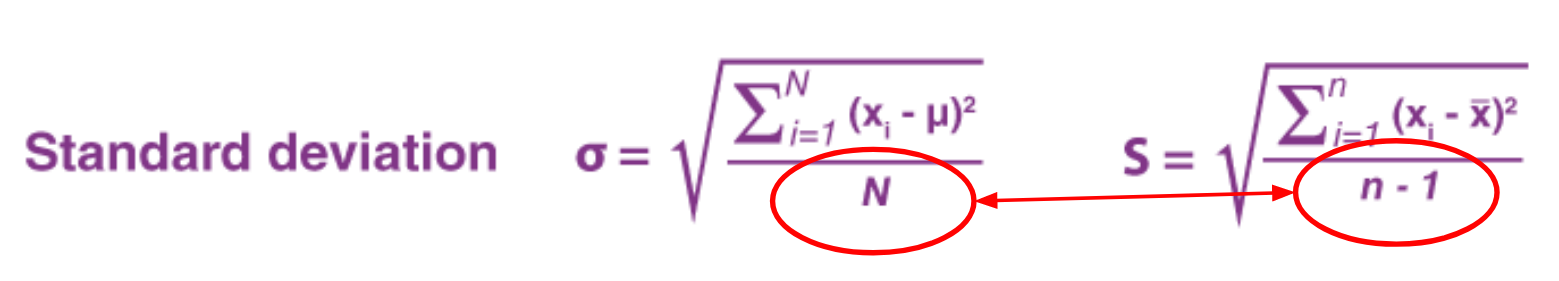

более техническая: `.info()`

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PROG    3 non-null      int64
 1   ANDAN   3 non-null      int64
dtypes: int64(2)
memory usage: 180.0 bytes


## Арифметика (по целым столбцам, как numpy!)

Есть арифметика, работающая как в `numpy` — с целыми столбцами

Есть математические методы:
`.mean()` — среднее


Если мы хотим усреднить значение по строкам, можно так:

In [31]:
(df['PROG'] + df['ANDAN']) / 2

0    9.5
1    7.5
2    9.5
dtype: float64

либо методом расчёта среднего `.mean()` проходясь по **всем** (двум сейчас) колонкам!

нужно только указать, что мы хотим усреднения по каждой строке `axis=1` (по умолчанию столбцы `axis=0`):

In [34]:
df.mean(axis=1)

0    9.5
1    7.5
2    9.5
dtype: float64

с суммой так же:

In [35]:
df.sum(axis=1)

0    19
1    15
2    19
dtype: int64

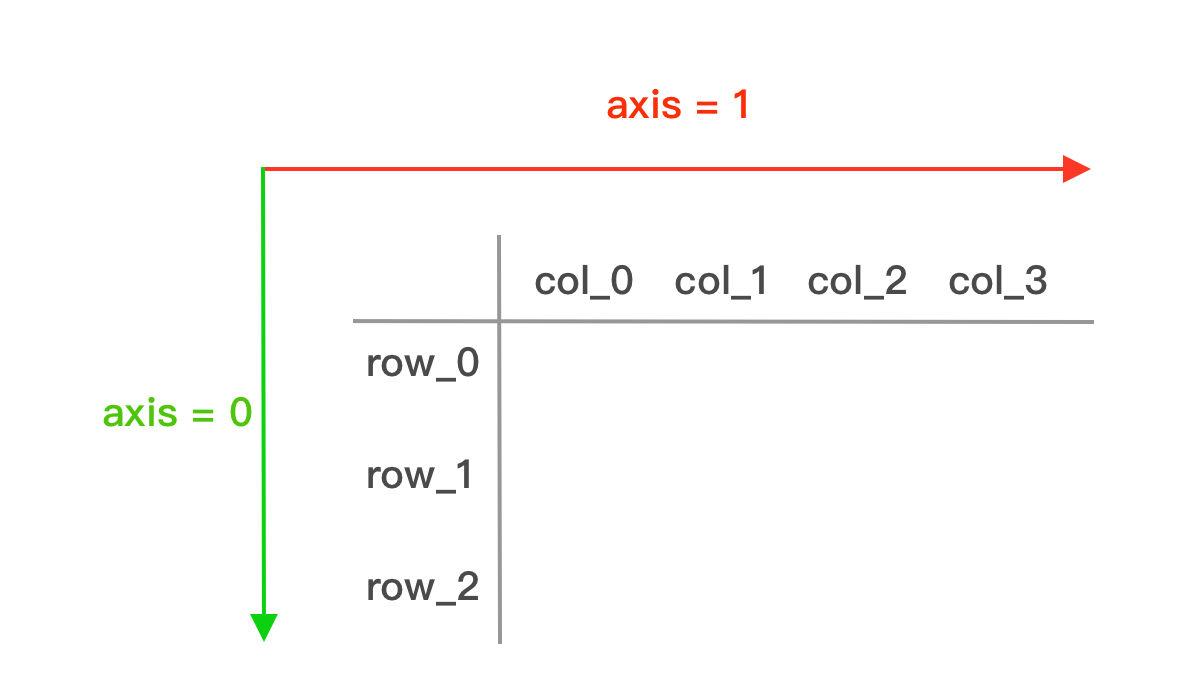

> `axis=0` — метод пройдётся по **строкам** для каждой колонки

> `axis=1` — метод пройдётся по **колонкам** для каждой строки

Всё сочетается с `.shape`: строки-столбцы:

In [103]:
df.shape  # кол-во строк, кол-во столбцов

(3, 2)

А по умолчанию в математических функциях как раз `axis=0` — для каждой колонки (проход по **строкам**)

In [37]:
df.mean()

PROG     8.666667
ANDAN    9.000000
dtype: float64

In [38]:
df.sum()

PROG     26
ANDAN    27
dtype: int64

In [40]:
df.std()

PROG     1.527525
ANDAN    1.000000
dtype: float64

In [46]:
np.std(df, ddof=0)

PROG     1.247219
ANDAN    0.816497
dtype: float64

#### Квартили

`.quantile`, `.median` для медианы

медиана:

In [48]:
df.quantile()

PROG     9.0
ANDAN    9.0
Name: 0.5, dtype: float64

In [49]:
df.quantile(0.5)

PROG     9.0
ANDAN    9.0
Name: 0.5, dtype: float64

In [50]:
df.median()

PROG     9.0
ANDAN    9.0
dtype: float64

*не-медиана*:



In [53]:
df.quantile(0.25)  # первый

PROG     8.0
ANDAN    8.5
Name: 0.25, dtype: float64

In [54]:
df.quantile(0.75)  # третий

PROG     9.5
ANDAN    9.5
Name: 0.75, dtype: float64

## Графики и корреляция

### Диаграма рассеяния

<Axes: xlabel='ANDAN', ylabel='PROG'>

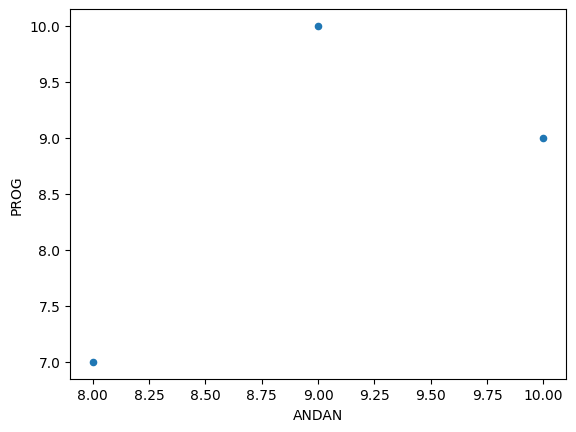

In [55]:
df.plot.scatter("ANDAN", "PROG")

### Линейный график

#### Тренировка

❓ Постройте аналогично линейный график 

`df.plot.line(...)`

In [67]:
# YOUR CODE HERE

сортировку обсудим позже

In [63]:
df.sort_values("ANDAN")

,PROG,ANDAN
1,7,8
0,10,9
2,9,10


## Работаем с колонкой

сохраним расчёты среднего:

In [73]:
df["AVERAGE"] = df.mean(axis=1)
df

,PROG,ANDAN,AVERAGE
0,10,9,9.5
1,7,8,7.5
2,9,10,9.5


In [74]:
df['PROG']

0    10
1     7
2     9
Name: PROG, dtype: int64

типы данных такие, как в numpy (не как в чистом питоне `int` / `float`)

In [11]:
df['PROG'].dtype  # тип данных

dtype('int64')

In [12]:
df['PROG'].name  # название колонки

'PROG'

Из значений колонки можно получить встроенную структуру Питона (список, множество и т.д.), а также словарь, где ключи — индексы (имена) строк, а значения — значения ячеек в этой колонке и этой строке.

In [75]:
list(df['PROG'])

[10, 7, 9]

In [76]:
set(df['PROG'])

{7, 9, 10}

In [77]:
dict(df['PROG'])

{0: 10, 1: 7, 2: 9}

Ещё можно получить массив numpy по специальному атрибуту `.values`

In [111]:
print(df['PROG'].values)

[10  7  9]


In [112]:
type(df['PROG'].values)

numpy.ndarray

сама колонка это не совсем массив numpy, но её значение (`.values`) это массив numpy!

### Несколько колонок

In [78]:
df[['PROG', 'ANDAN']]

,PROG,ANDAN
0,10,9
1,7,8
2,9,10


In [79]:
df[['AVERAGE', 'PROG']]

,AVERAGE,PROG
0,9.5,10
1,7.5,7
2,9.5,9


In [80]:
df

,PROG,ANDAN,AVERAGE
0,10,9,9.5
1,7,8,7.5
2,9,10,9.5


## Нахождение в таблице

**Колонки** можно переименовать 

Например, все сразу

In [81]:
df.columns

Index(['PROG', 'ANDAN', 'AVERAGE'], dtype='object')

In [82]:
df.columns = ['PYTHON', 'STATS', 'AVERAGE']

In [83]:
df.columns

Index(['PYTHON', 'STATS', 'AVERAGE'], dtype='object')

In [119]:
df

,PYTHON,STATS,AVERAGE
0,10,9,9.5
1,7,8,7.5
2,9,10,9.5


**Строки**

In [120]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [121]:
df.iloc[0]  # это нулевая строка

PYTHON     10.0
STATS       9.0
AVERAGE     9.5
Name: 0, dtype: float64

In [122]:
df.loc[0]  # это строка с индексом ноль

PYTHON     10.0
STATS       9.0
AVERAGE     9.5
Name: 0, dtype: float64

В чём разница между `.loc()` и `.iloc()`?

**Строки** (их индексы) тоже можно переименовать.

Сделаем индексацию колонок не числовую!

In [124]:
df.index = ['Mark', 'Alice', 'Shura']

In [125]:
df

,PYTHON,STATS,AVERAGE
Mark,10,9,9.5
Alice,7,8,7.5
Shura,9,10,9.5


In [126]:
df.iloc[0]

PYTHON     10.0
STATS       9.0
AVERAGE     9.5
Name: Mark, dtype: float64

In [127]:
# df.loc[0]
df.loc['Mark']

PYTHON     10.0
STATS       9.0
AVERAGE     9.5
Name: Mark, dtype: float64

Итого: `.iloc()` — для числовых индексов (они всегда доступны), `.loc()` — для индексов таблицы, выделенных жирным

### Тренировка

❓ Что у Шуры по питону? (3+ способов)

❓ Что у Алисы по статистике? (3+ способов) Что у Алисы по статистике? (3+ способов)

# Загрузка данных в pandas

In [136]:
df_csv = pd.read_csv('data/students.csv')
df_csv

,Имя Фамилия,EMAIL,КР,ИТОГ
0,Иван Иванов,ivanov@hse.ru,5,6
1,Петр Петров,petrov@hse.ru,8,10
2,Мария Кузнецова,kuznetsova@hse.ru,7,8
3,Татьяна Смирнова,smirnova@hse.ru,3,9
4,Камиль Ахметов,akhmetov@hse.ru,8,6
5,Софья Сонина,sonina@hse.ru,10,10
6,Андрей Андреев,andreev@hse.ru,2,4
7,Алина Хисматуллина,khismatullina@hse.ru,3,3
8,Семен Семенов,semenov@hse.ru,5,8
9,Макар Макаров,makarov@hse.ru,9,6


In [137]:
df_csv.head(4)

,Имя Фамилия,EMAIL,КР,ИТОГ
0,Иван Иванов,ivanov@hse.ru,5,6
1,Петр Петров,petrov@hse.ru,8,10
2,Мария Кузнецова,kuznetsova@hse.ru,7,8
3,Татьяна Смирнова,smirnova@hse.ru,3,9


In [138]:
df_csv.tail(2)

,Имя Фамилия,EMAIL,КР,ИТОГ
13,Екатерина Катина,katina@hse.ru,5,4
14,Елена Ленина,lenina@hse.ru,6,6


In [140]:
# Как открыть файл с разделителем не ',' и без названий колонок?
df_csv_sep = pd.read_csv('data/sent_len.csv')
df_csv_sep.head()

,А. П. Чехов;2
0,А. П. Чехов;13
1,А. П. Чехов;4
2,А. П. Чехов;7
3,А. П. Чехов;11
4,А. П. Чехов;37


In [142]:
# указали разделитель
df_csv_sep = pd.read_csv('data/sent_len.csv', sep=';')
df_csv_sep.tail()

,А. П. Чехов,2
885,Л. Н. Толстой,40
886,Л. Н. Толстой,53
887,Л. Н. Толстой,70
888,Л. Н. Толстой,90
889,Л. Н. Толстой,26


In [143]:
# указали, что в первой строке нет названий столбцов
df_csv_sep = pd.read_csv('data/sent_len.csv', sep=';', header=None)
df_csv_sep.head()

,0,1
0,А. П. Чехов,2
1,А. П. Чехов,13
2,А. П. Чехов,4
3,А. П. Чехов,7
4,А. П. Чехов,11


In [144]:
# добавили названия столбцов
df_csv_sep = pd.read_csv('data/sent_len.csv', sep=';',
                         header=None, names=['автор', 'слова'])
df_csv_sep.head()

,автор,слова
0,А. П. Чехов,2
1,А. П. Чехов,13
2,А. П. Чехов,4
3,А. П. Чехов,7
4,А. П. Чехов,11


In [150]:
# открыли файл 'verbs.txt' с помощью read_csv
df_txt = pd.read_csv('data/verbs.txt', sep=';', header=None,
                    names=['pres', 'V2', 'V3', 'russian'])
df_txt.head()

,pres,V2,V3,russian
0,arise,arose,arisen,подниматься
1,be,was/were,been,быть
2,bear,bore,born,родить
3,become,became,become,сделаться
4,begin,began,begun,начинать(ся)


Откройте `bi_femcorp.tsv`

In [146]:
# открывая текстовые файлы с разным расширением (.csv, .tsv, .txt), используйте read_csv
df_tsv = pd.read_csv('data/bi_femcorp.tsv', sep='\t')

In [147]:
df_tsv

,bi_token,uni_first_token,uni_first_lemma,uni_first_POS,uni_second_token,uni_second_lemma,uni_second_POS,Sent_ids,Ids
0,"('в', 'июне')",в,в,PREP,июне,июнь,NOUN,0 861,"['0', '861']"
1,"('июне', 'этого')",июне,июнь,NOUN,этого,это,NPRO,0,['0']
2,"('этого', 'года')",этого,это,NPRO,года,год,NOUN,0 473 1169 1672 1756 3155,"['0', '473', '1756', '1672', '1169', '3155']"
3,"('года', 'девушка')",года,год,NOUN,девушка,девушка,NOUN,0,['0']
4,"('девушка', 'по')",девушка,девушка,NOUN,по,по,PREP,0,['0']
...,...,...,...,...,...,...,...,...,...
41739,"('устанавливает', 'датчики')",устанавливает,устанавливать,VERB,датчики,датчик,NOUN,3466,['3466']
41740,"('датчики', 'и')",датчики,датчик,NOUN,и,и,CONJ,3466,['3466']
41741,"('затем', 'программирует')",затем,затем,ADVB,программирует,программировать,VERB,3466,['3466']
41742,"('программирует', 'их')",программирует,программировать,VERB,их,они,NPRO,3466,['3466']


In [148]:
# открыть можно и excel
df_excel = pd.read_excel('data/coffee_stats.xlsx')

In [149]:
df_excel

,Тип кофе,Размер,Сироп
0,раф,большой,шоколадный
1,капучино,большой,ванильный
2,раф,маленький,розовый
3,раф,большой,карамельный
4,латте,маленький,NaN
...,...,...,...
144,латте,большой,карамельный
145,капучино,большой,кленовый
146,раф,большой,шоколадный
147,раф,средний,карамельный


## Запись таблицы в файл

In [85]:
df.to_csv("scores.csv")

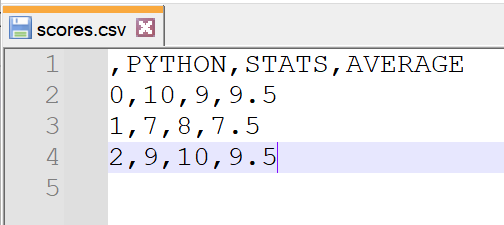